In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('on')
    plt.show()

In [68]:
MAX = 255

def PSNR(image1, image2):
    
    """
    'Peak signal-to-noise ratio' metrics of images similarity
    PSNR = 0 if images are opposite; PSNR = infinity if images are coincide
    """
    
    height, width, depth = image1.shape 
    MSE = 1.0 * np.sum((image1 - image2)**2) / (height * width * depth)
    psnr = 20 * np.log10(MAX) - 10 * np.log10(MSE)
    return psnr

In [69]:
def my_object_detection(image, template, stride = 5):
    
    """
    PARAMETERS
    image - input image
    template - template of image we are searching for
    stride - stride of brute forcing of centers coordiates in both x- and y-axis
    
    RETURNS
    similarity - similarity of image part located in this corner with templated, computed using PSNR metric
    """
    
    height, width = image.shape[0], image.shape[1]
    obj_h, obj_w = template.shape[0], object_.shape[1]
    similarity = np.zeros([np.int32((height-obj_h)/stride), np.int32((width-obj_w)/stride)])
    for x in range(0, height-obj_h, stride):
        for y in range(0, width-obj_w, stride):
            i = np.int32(x / stride)
            j = np.int32(y / stride)
            similarity[i, j] = PSNR(image[x:x+obj_h, y:y+obj_w, :], template)
    return similarity

In [70]:
def show_detected_objects(image, corners, obj_height, obj_width, stride = 5, title = 'Image'):
    fig, ax = plt.subplots()
    plt.imshow(image)
    corners = corners
    for [x, y] in corners:
        x = 5*x
        y = 5*y
        borber = np.array([[x, y], [x+obj_height, y], [x+obj_height, y+obj_width], [x, y+obj_width], [x, y]])
        plt.plot(borber[:,1], borber[:,0], c = 'g')
    plt.title(title)
    plt.show()

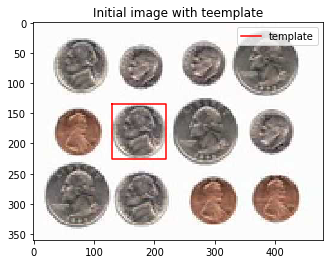

In [71]:
img = plt.imread(r'C:\Users\111\Desktop\Image_processing\coursera\coins.jpg')
x_min, x_max = 135, 225
y_min, y_max = 130, 220
borber = np.array([[x_min, y_min], [x_min, y_max], [x_max, y_max], [x_max, y_min], [x_min, y_min]])
fig, ax = plt.subplots()
plt.imshow(img)
plt.plot(borber[:,1], borber[:,0], c = 'r', label = 'template')
plt.axis('on')
plt.title('Initial image with teemplate')
ax.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


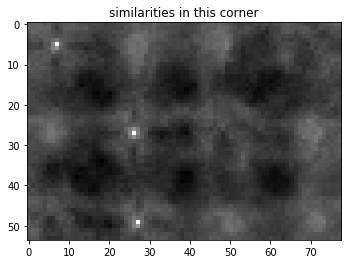

In [72]:
object_ = np.array(img[x_min:x_max, y_min:y_max, :], dtype = img.dtype)
similarity = my_object_detection(img, object_, stride = 5)
show_image(similarity, title = 'similarities in this corner')

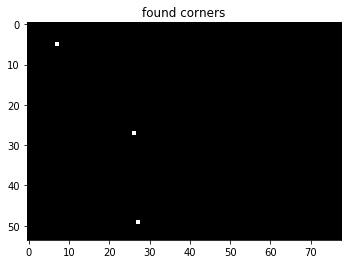

In [73]:
threshold = 29
similarity[similarity < threshold] = 0
similarity[similarity >= threshold] = 1
show_image(similarity, title = 'found corners')

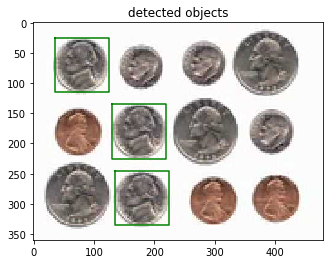

In [74]:
corners = []
for x in range(similarity.shape[0]):
    for y in range(similarity.shape[1]):
        if similarity[x, y] == 1:
            corners = corners + [[x, y]]
show_detected_objects(img, corners, 90, 90, title = 'detected objects')

Бачимо, що алгоритм, що базується на порівнянні шматків зображення з шаблоном попіксельно, дійсно знаходить схожі шматки того самого розміру, але погано впізнає подібні шматки навіть трохи іншого розміру.